In [20]:
import importlib
import problems
import matplotlib.pyplot as plt
importlib.reload(problems)


<module 'problems' from '/home/workspace/problems.py'>

In [21]:
results = problems.resnet_18_timeloop_loop()

0 l1_conv1 1
  Running config: base
[INFO] 2025-04-16 15:07:08,874 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


KeyboardInterrupt: 

In [ ]:
# BASE RESULTS:
# Energy: [18189443.42, 18068168.51, 18068168.51, 10162371.42, 18139092.05, 10241601.37, 18303869.46, 10446858.21, 18746906.98]
# Cycles: [7552892928, 7398752256, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256, 3699376128, 7398752256]
# DP RESULTS:
# Energy: [18045156.18, 17923975.42, 17923975.42, 10084573.9, 17983497.0, 10140999.93, 18102666.57, 10255041.09, 18363272.74]
# Cycles: [1888223232, 1849688064, 1849688064, 924844032, 1849688064, 924844032, 1849688064, 924844032, 1849688064]
# TP RESULTS:
# Energy: [13111780.74, 12878293.61, 12878293.61, 6480110.39, 12895934.68, 6507412.51, 12948728.6, 6606104.42, 13146124.91]
# Cycles: [1888223232, 1849688064, 1849688064, 924844032, 1849688064, 924844032, 1849688064, 924844032, 1849688064]

In [15]:
def plot_total_cycles(results):
    # Compute total cycles per config
    total_cycles = {config: sum(data["cycles"]) for config, data in results.items()}
    
    # Extract configs and values
    configs = list(total_cycles.keys())
    cycles = list(total_cycles.values())

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.bar(configs, cycles, color=["gray", "skyblue", "orange"])
    plt.title("Total Cycles by Configuration")
    plt.xlabel("Configuration")
    plt.ylabel("Total Cycles")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

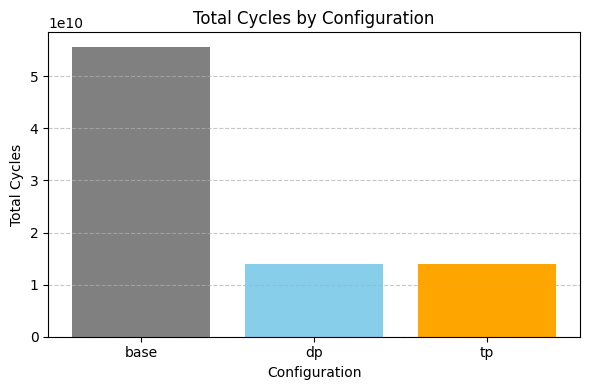

In [16]:
plot_total_cycles(results)

In [17]:
def plot_total_energy(results):
    # Compute total energy per config
    total_energy = {config: sum(data["energy"]) for config, data in results.items()}
    
    # Extract configs and values
    configs = list(total_energy.keys())
    energy = list(total_energy.values())

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.bar(configs, energy, color=["green", "cornflowerblue", "salmon"])
    plt.title("Total Energy by Configuration")
    plt.xlabel("Configuration")
    plt.ylabel("Total Energy")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

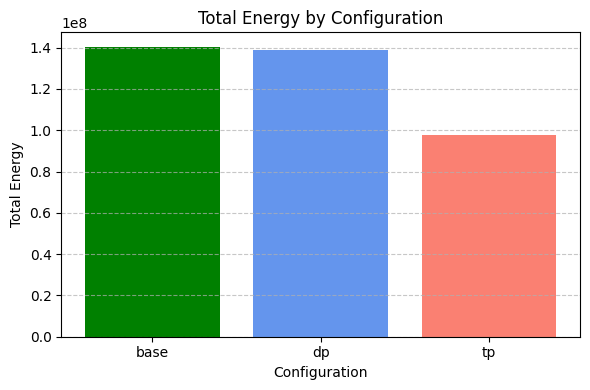

In [18]:
plot_total_energy(results)

In [46]:
def estimate_hops(config, N, M, C, R, S, P, Q):
    pe_N = config.get('PE_spatial_factor_N', 1)
    pe_M = config.get('PE_spatial_factor_M', 1)
    pe_C = config.get('PE_spatial_factor_C', 1)

    if pe_M > 1 and pe_N == 1 and pe_C == 1:
        print("TP Mode")
        return N * P * Q * (pe_M - 1)

    if pe_N > 1 and pe_M == 1 and pe_C == 1:
        print("DP Mode")
        return M * C * R * S * (pe_N - 1)

    print("Base Mode")
    return 0

def estimate_latency(cycles, frequency_hz=1e9): # Use 1 GHz for frequency
    latency_seconds = cycles / frequency_hz
    latency_ms = latency_seconds * 1e3
    return latency_ms


Base Mode
Base Mode
Base Mode
Base Mode
Base Mode
Base Mode
Base Mode
Base Mode
Base Mode
DP Mode
DP Mode
DP Mode
DP Mode
DP Mode
DP Mode
DP Mode
DP Mode
DP Mode
TP Mode
TP Mode
TP Mode
TP Mode
TP Mode
TP Mode
TP Mode
TP Mode
TP Mode


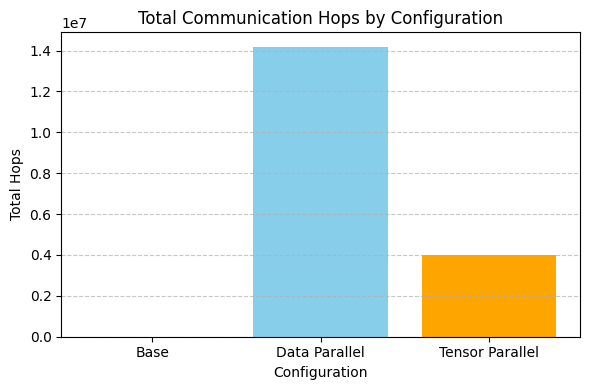

In [47]:
def get_hop_results(configs):
    results = []
    for i, shape in enumerate(problems.layer_shapes):
        hops = estimate_hops(configs[i], **shape)
        latency_ms = estimate_latency(hops * 10)  # assume 10 cycles per hop
        results.append({
            'layer': i + 1,
            'hops': hops,
            'latency_ms': latency_ms
        })
    return results

base_hops = get_hop_results(problems.base_configs)
dp_hops = get_hop_results(problems.dp_configs)
tp_hops = get_hop_results(problems.tp_configs)

def plot_total_hops(base_results, dp_results, tp_results):

    total_base_hops = sum(r["hops"] for r in base_results)
    total_dp_hops = sum(r["hops"] for r in dp_results)
    total_tp_hops = sum(r["hops"] for r in tp_results)

    configs = ["Base", "Data Parallel", "Tensor Parallel"]
    hops = [total_base_hops, total_dp_hops, total_tp_hops]

    # Plotting
    plt.figure(figsize=(6, 4))
    plt.bar(configs, hops, color=["gray", "skyblue", "orange"])
    plt.title("Total Communication Hops by Configuration")
    plt.xlabel("Configuration")
    plt.ylabel("Total Hops")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_total_hops(base_hops, dp_hops, tp_hops)
# Optional: print results
# for r in results:
#     print(f"Layer {r['layer']}: Hops = {r['hops']}, Latency = {r['latency_ms']:.2f} ms")